In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import os
import re
from tqdm import trange, tqdm, tqdm_notebook
import time
from math import ceil
import scipy

from matplotlib.font_manager import FontProperties
import matplotlib.patches as mpatches
import warnings

%matplotlib inline

sns.set(style="ticks", color_codes=True)

In [2]:
url = r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
df = pd.read_csv(url)

In [3]:
by_country = df.groupby(["Country/Region"]).agg(sum).reset_index()
by_country.drop(['Lat', 'Long'], inplace=True, axis=1)

In [4]:
all_countries_ts = by_country.pivot_table(index='Country/Region')

In [5]:
all_countries_ts

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,11,16,1,1,1,1,1,1,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,38,42,0,0,0,0,0,0,0,2
Algeria,0,0,0,0,0,0,0,0,0,0,...,37,48,3,5,12,12,17,17,19,20
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0,0,0,0,0,0,0,0,0,0,...,4,4,0,0,0,0,0,0,0,0
Uzbekistan,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,0,0,0,0,...,2,10,0,0,0,0,0,0,0,0


In [6]:
# all_countries_ts['Date'] = pd.to_datetime(all_countries_ts['Country/Region'])
# all_countries_ts.set_index('Date', inplace=True)
# all_countries_ts.drop(['Country/Region'], inplace=True)

In [7]:
time_series_by_country = by_country.melt(id_vars="Country/Region", var_name='Date', value_name='Confirmed')
time_series_by_country['Date'] = pd.to_datetime(time_series_by_country['Date'])


In [8]:
k = 10
k_countries = np.random.choice(time_series_by_country['Country/Region'], size=k)

k_countries_ts = time_series_by_country[time_series_by_country['Country/Region'].isin(k_countries)]

Text(0.5, 1.0, 'Confirmed cases per day: 10 random countries')

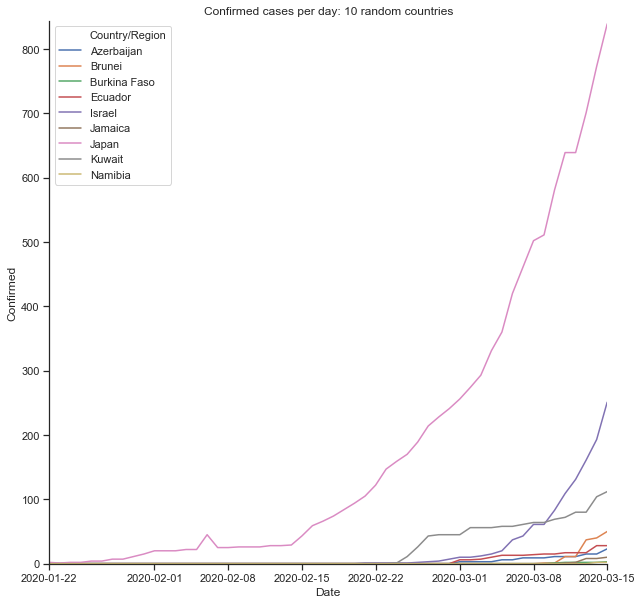

In [9]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Date', y='Confirmed', data=k_countries_ts, hue='Country/Region', hue_norm=LogNorm())
plt.xlim(min(k_countries_ts.Date), max(k_countries_ts.Date))
plt.ylim(-1, max(k_countries_ts.Confirmed)+5)
sns.despine()
plt.title(f"Confirmed cases per day: {k} random countries")

## Israel only

In [10]:
Israel_ts = time_series_by_country[(time_series_by_country['Country/Region'] == 'Israel') & (time_series_by_country['Confirmed'] > 0) ]
y=np.array(Israel_ts.Confirmed, dtype=float)
x=np.array(Israel_ts.Date.values, dtype=float)

slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x,y)
print("\t".join(["slope", "intercept", "r_value", "p_value", "std_err"]))
print("\t".join([f"{x:.5f}" for x in [slope, intercept, r_value, p_value, std_err]]))

xf = np.linspace(min(x),max(x),len(x))
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

slope	intercept	r_value	p_value	std_err
0.00000	-153524.49435	0.84924	0.00000	0.00000
r =0.8492352666480096
p =1.5424926606741528e-07
s =1.2858252305497583e-14


In [11]:
# Same thing, fit exponential
# Israel only

# for log scale
Israel_ts_log = time_series_by_country[(time_series_by_country['Country/Region'] == 'Israel') & (time_series_by_country['Confirmed'] > 1) ]

y_log=np.array(np.log(Israel_ts_log.Confirmed), dtype=float)
x_log=np.array(Israel_ts_log.Date.values, dtype=float)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_log, y_log)
print("\t".join(["slope", "intercept", "r_value", "p_value", "std_err"]))
print("\t".join([f"{x:.5f}" for x in [slope, intercept, r_value, p_value, std_err]]))

xf = np.linspace(min(x_log),max(x_log),len(x_log))
xf1_log = xf.copy()
xf1_log = pd.to_datetime(xf1_log)
yf_log = np.exp((slope*xf)+intercept)
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)


slope	intercept	r_value	p_value	std_err
0.00000	-4790.70977	0.99390	0.00000	0.00000
r =0.9939038087163352
p =1.0073747891652397e-17
s =8.145346230630186e-17


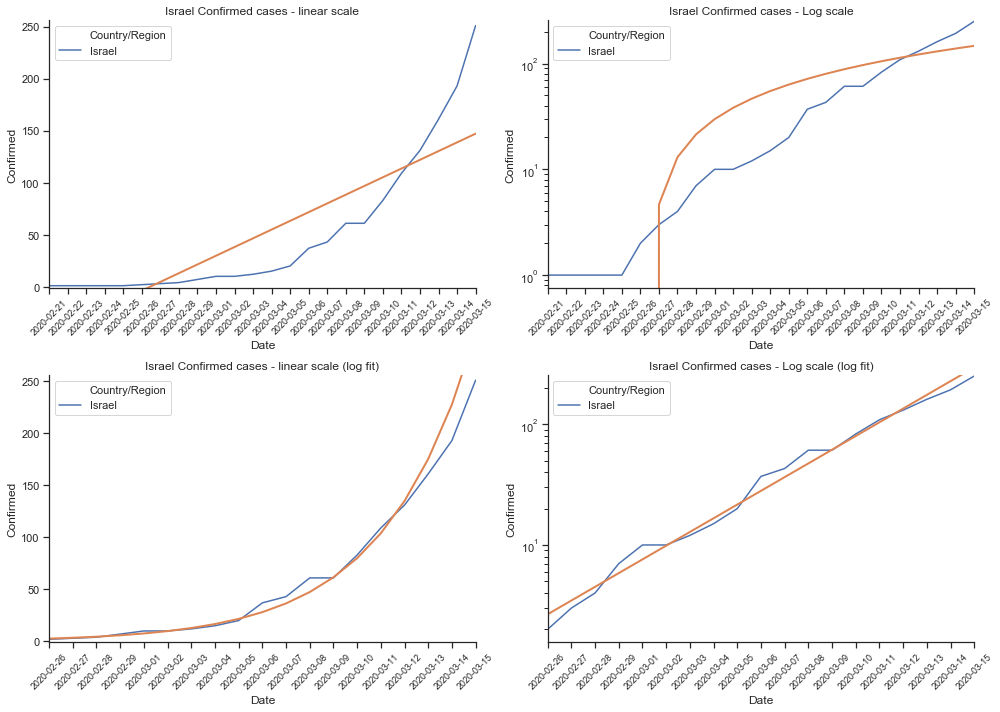

In [12]:
fig, ax = plt.subplots(2,2, figsize=(14,14))

sns.lineplot(x='Date', y='Confirmed', data=Israel_ts, hue='Country/Region', ax=ax[0,0])
ax[0,0].plot(xf1, yf, label='Linear fit', lw=2)
ax[0,0].set_xticks(Israel_ts.Date)
ax[0,0].set_xticklabels([x.date() for x in Israel_ts.Date])
ax[0,0].tick_params(axis='x', labelrotation=45, labelsize=9)
# ax[0,0].set_xticklabels([x.date() for x in Israel_ts.Date], rotation=45, fontsize=9)
ax[0,0].set_xlim(min(Israel_ts.Date), max(Israel_ts.Date))
ax[0,0].set_ylim(-1, max(Israel_ts.Confirmed)+5)
# plt.xlim(min(Israel_ts.Date), max(Israel_ts.Date))
# plt.ylim(-1, max(Israel_ts.Confirmed)+5)
ax[0,0].set_title("Israel Confirmed cases - linear scale")

# ax[1].set_title("Israel")
ax[0,1].set(yscale='log')
sns.lineplot(x='Date', y='Confirmed', data=Israel_ts, hue='Country/Region', ax=ax[0,1])
ax[0,1].plot(xf1, yf,label='Linear fit', lw=2)
ax[0,1].set_xticks(Israel_ts.Date)
ax[0,1].set_xticklabels([x.date() for x in Israel_ts.Date])
ax[0,1].tick_params(axis='x', labelrotation=45, labelsize=9)
ax[0,1].set_xlim(min(Israel_ts.Date), max(Israel_ts.Date))
ax[0,1].set_ylim(-1, max(Israel_ts.Confirmed)+5)
ax[0,1].set_title("Israel Confirmed cases - Log scale")

sns.lineplot(x='Date', y='Confirmed', data=Israel_ts_log, hue='Country/Region', ax=ax[1,0])
ax[1,0].plot(xf1_log, yf_log, label='Exponential fit', lw=2)
ax[1,0].set_xticks(Israel_ts_log.Date)
ax[1,0].set_xticklabels([x.date() for x in Israel_ts_log.Date])
ax[1,0].tick_params(axis='x', labelrotation=45, labelsize=9)
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
ax[1,0].set_xlim(min(Israel_ts_log.Date), max(Israel_ts_log.Date))
ax[1,0].set_ylim(-1, max(Israel_ts_log.Confirmed)+5)
# plt.xlim(min(Israel_ts.Date), max(Israel_ts.Date))
# plt.ylim(-1, max(Israel_ts.Confirmed)+5)
ax[1,0].set_title("Israel Confirmed cases - linear scale (log fit)")

# ax[1].set_title("Israel")
ax[1,1].set(yscale='log')
sns.lineplot(x='Date', y='Confirmed', data=Israel_ts_log, hue='Country/Region', ax=ax[1,1])
ax[1,1].plot(xf1_log, yf_log,label='Exponential fit', lw=2)
ax[1,1].set_xticks(Israel_ts_log.Date)
ax[1,1].set_xticklabels([x.date() for x in Israel_ts_log.Date])
ax[1,1].tick_params(axis='x', labelrotation=45, labelsize=9)
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
ax[1,1].set_xlim(min(Israel_ts_log.Date), max(Israel_ts_log.Date))
ax[1,1].set_ylim(-1, max(Israel_ts_log.Confirmed)+5)
ax[1,1].set_title("Israel Confirmed cases - Log scale (log fit)")

sns.despine()
plt.tight_layout()

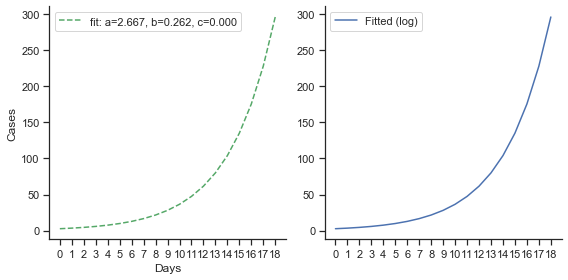

In [17]:
def exponential(x, a, b, c):
    return a * np.exp(x * b) + c

popt, pcov = scipy.optimize.curve_fit(exponential, np.array(range(len(yf_log))), yf_log, maxfev=100000)
# popt

plt.subplots(12, figsize=(8,4))
plt.subplot(121)
plt.plot(list(range(len(yf_log))), exponential(np.array(range(len(yf_log))), *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel("Days")
plt.ylabel("Cases")
plt.xticks(range(len(xf1_log)), range(len(xf1_log)))
# plt.plot(x_log, yf_log, '-', label='Fitted (log)')
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
plt.legend()
plt.subplot(122)
plt.plot(xf1_log, yf_log, '-', label='Fitted (log)')
plt.xticks(xf1_log, range(len(xf1_log)))
plt.legend()
sns.despine()
plt.tight_layout()

Fitted growth curve:
$$y = 0.27 * x^{0.26} $$

# Same for Italy

In [18]:
Italy_ts = time_series_by_country[(time_series_by_country['Country/Region'] == 'Italy') & (time_series_by_country['Confirmed'] > 0) ]

y=np.array(Italy_ts.Confirmed, dtype=float)
x=np.array(Italy_ts.Date.values, dtype=float)

slope, intercept, r_value, p_value, std_err =scipy.stats.linregress(x,y)
print("\t".join(["slope", "intercept", "r_value", "p_value", "std_err"]))
print("\t".join([f"{x:.5f}" for x in [slope, intercept, r_value, p_value, std_err]]))

xf = np.linspace(min(x),max(x),len(x))
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

slope	intercept	r_value	p_value	std_err
0.00000	-6106277.02617	0.73413	0.00000	0.00000
r =0.7341278783262588
p =9.543470391343784e-09
s =5.445983025789813e-13


In [19]:
# Same thing, fit exponential
# Italy only

# for log scale
Italy_ts_log = time_series_by_country[(time_series_by_country['Country/Region'] == 'Italy') & (time_series_by_country['Confirmed'] > 1) ]

y_log=np.array(np.log(Italy_ts_log.Confirmed), dtype=float)
x_log=np.array(Italy_ts_log.Date.values, dtype=float)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_log, y_log)
print("\t".join(["slope", "intercept", "r_value", "p_value", "std_err"]))
print("\t".join([f"{x:.5f}" for x in [slope, intercept, r_value, p_value, std_err]]))

xf = np.linspace(min(x_log),max(x_log),len(x_log))
xf1_log = xf.copy()
xf1_log = pd.to_datetime(xf1_log)
yf_log = np.exp((slope*xf)+intercept)
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)


slope	intercept	r_value	p_value	std_err
0.00000	-4801.53131	0.95197	0.00000	0.00000
r =0.9519653395776876
p =1.0037917011402156e-23
s =1.4898662054894722e-16


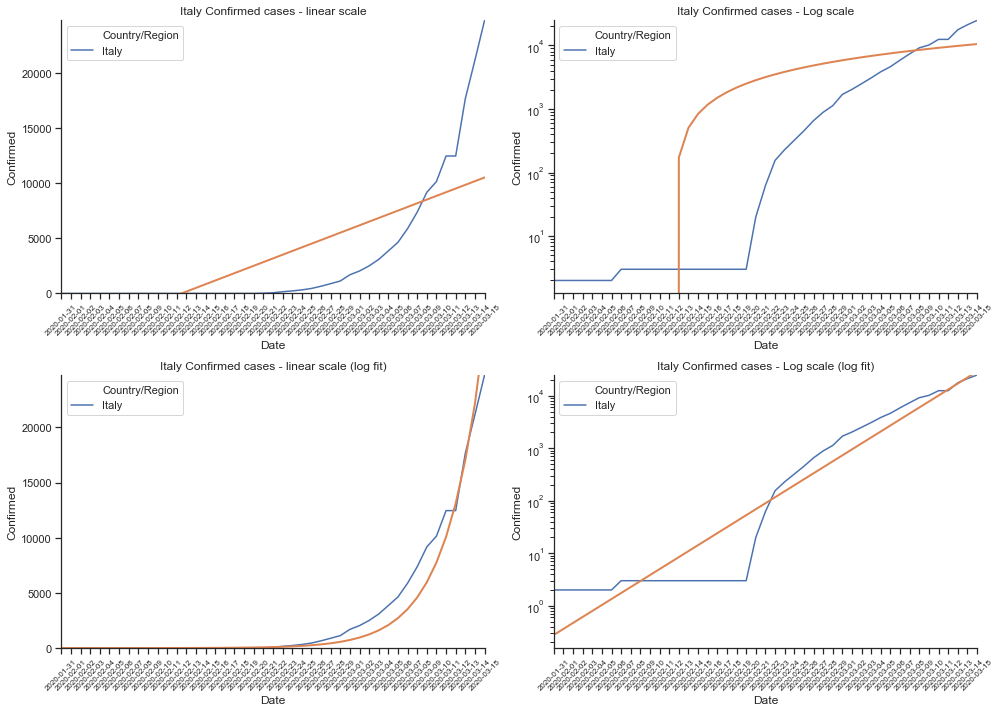

In [21]:
fig, ax = plt.subplots(2,2, figsize=(14,10))

sns.lineplot(x='Date', y='Confirmed', data=Italy_ts, hue='Country/Region', ax=ax[0,0])
ax[0,0].plot(xf1, yf, label='Linear fit', lw=2)
ax[0,0].set_xticks(Italy_ts.Date)
ax[0,0].set_xticklabels([x.date() for x in Italy_ts.Date])
ax[0,0].tick_params(axis='x', labelrotation=45, labelsize=8)
# ax[0,0].set_xticklabels([x.date() for x in Israel_ts.Date], rotation=45, fontsize=9)
ax[0,0].set_xlim(min(Italy_ts.Date), max(Italy_ts.Date))
ax[0,0].set_ylim(-1, max(Italy_ts.Confirmed)+5)
# plt.xlim(min(Israel_ts.Date), max(Israel_ts.Date))
# plt.ylim(-1, max(Israel_ts.Confirmed)+5)
ax[0,0].set_title("Italy Confirmed cases - linear scale")

# ax[1].set_title("Israel")
ax[0,1].set(yscale='log')
sns.lineplot(x='Date', y='Confirmed', data=Italy_ts, hue='Country/Region', ax=ax[0,1])
ax[0,1].plot(xf1, yf,label='Linear fit', lw=2)
ax[0,1].set_xticks(Italy_ts_log.Date)
ax[0,1].set_xticklabels([x.date() for x in Italy_ts.Date])
ax[0,1].tick_params(axis='x', labelrotation=45, labelsize=8)
ax[0,1].set_xlim(min(Italy_ts.Date), max(Italy_ts.Date))
ax[0,1].set_ylim(-1, max(Italy_ts.Confirmed)+5)
ax[0,1].set_title("Italy Confirmed cases - Log scale")

sns.lineplot(x='Date', y='Confirmed', data=Italy_ts_log, hue='Country/Region', ax=ax[1,0])
ax[1,0].plot(xf1_log, yf_log, label='Exponential fit', lw=2)
ax[1,0].set_xticks(Italy_ts_log.Date)
ax[1,0].set_xticklabels([x.date() for x in Italy_ts_log.Date])
ax[1,0].tick_params(axis='x', labelrotation=45, labelsize=8)
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
ax[1,0].set_xlim(min(Italy_ts_log.Date), max(Italy_ts_log.Date))
ax[1,0].set_ylim(-1, max(Italy_ts_log.Confirmed)+5)
# plt.xlim(min(Israel_ts.Date), max(Israel_ts.Date))
# plt.ylim(-1, max(Israel_ts.Confirmed)+5)
ax[1,0].set_title("Italy Confirmed cases - linear scale (log fit)")

# ax[1].set_title("Israel")
ax[1,1].set(yscale='log')
sns.lineplot(x='Date', y='Confirmed', data=Italy_ts_log, hue='Country/Region', ax=ax[1,1])
ax[1,1].plot(xf1_log, yf_log,label='Exponential fit', lw=2)
ax[1,1].set_xticks(Italy_ts_log.Date)
ax[1,1].set_xticklabels([x.date() for x in Italy_ts_log.Date])
ax[1,1].tick_params(axis='x', labelrotation=45, labelsize=8)
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
ax[1,1].set_xlim(min(Italy_ts_log.Date), max(Italy_ts_log.Date))
ax[1,1].set_ylim(-1, max(Italy_ts_log.Confirmed)+5)
ax[1,1].set_title("Italy Confirmed cases - Log scale (log fit)")

sns.despine()
plt.tight_layout()

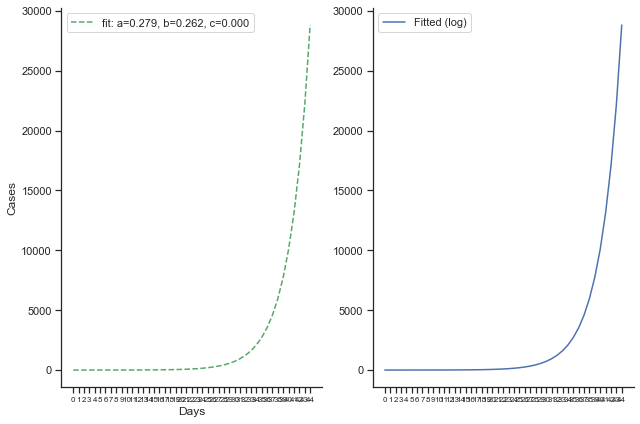

In [28]:
def exponential(x, a, b, c):
    return a * np.exp(x * b) + c

popt, pcov = scipy.optimize.curve_fit(exponential, np.array(range(len(yf_log))), yf_log, maxfev=100000)
# popt

plt.subplots(12, figsize=(9,6))
plt.subplot(121)
plt.plot(list(range(len(yf_log))), exponential(np.array(range(len(yf_log))), *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel("Days")
plt.ylabel("Cases")
plt.xticks(range(len(xf1_log)), range(len(xf1_log)), fontsize=8)
# plt.plot(x_log, yf_log, '-', label='Fitted (log)')
# plt.xticks(Israel_ts_log.Date, [x.date() for x in Israel_ts_log.Date], rotation=45, fontsize=9)
plt.legend()
plt.subplot(122)
plt.plot(xf1_log, yf_log, '-', label='Fitted (log)')
plt.xticks(xf1_log, range(len(xf1_log)), fontsize=8)
plt.legend()
sns.despine()
plt.tight_layout()

Fitted growth curve - Italy:
$$y = 0.28 * x^{0.26} $$